# Module 1 - Manipulating data with Pandas

### Introduction
You have decided that you want to start your own animal shelter, but you want to get an idea of what that will entail and get more information about planning. In this lecture, we are continue to look at a real data set collected by Austin Animal Center over several years and use our pandas skills from the last lecture and learn some new ones in order to explore this data further.

#### _Our goals today are to be able to_: <br/>

- Apply and use info, describe, mean, min, max, apply, and applymap from the Pandas library
- Explain what a groupby object is and split a DataFrame using a groupby
- Explain lambda functions and use them to use an apply on a DataFrame
- Reshape a DataFrame using joins, merges, pivoting, stacking, and melting


#### Getting started

Let's take a moment to examine the [Austin Animal Center data set](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238/data). What kinds of questions can we ask this data and what kinds of information can we get back?

In pairs and as a class, let's generate ideas.

### 1. Applying and using info, describe, mean, min, max, apply, and applymap from the Pandas library

The Pandas library has several useful tools built in. Let's explore some of them.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

uci = pd.read_csv('heart.csv')
#comas separating values (CSV)

In [2]:
uci.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
uci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Read about this dataset here: https://www.kaggle.com/ronitf/heart-disease-uci.

Notice the name of the last column!

#### The .columns and .shape Attributes

In [4]:
uci.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
uci.shape

(303, 14)

#### The .info() and .describe() Methods


Pandas DataFrames have many useful methods! Let's look at ```.info()``` and ```.describe()```.

In [6]:
# Call the .info() method on our dataset. What do you observe?

uci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# Call the .describe() method on our dataset. What do you observe?
uci.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### .mean(), .min(), .max(), .sum()

The methods .mean(), .min(), and .max() will perform just the way you think they will!

Note that these are methods both for Series and for DataFrames.

In [8]:
uci.mean()

age          54.366337
sex           0.683168
cp            0.966997
trestbps    131.623762
chol        246.264026
fbs           0.148515
restecg       0.528053
thalach     149.646865
exang         0.326733
oldpeak       1.039604
slope         1.399340
ca            0.729373
thal          2.313531
target        0.544554
dtype: float64

#### The Axis Variable

In [9]:
uci.sum() # Try [shift] + [tab] here!

age         16473.0
sex           207.0
cp            293.0
trestbps    39882.0
chol        74618.0
fbs            45.0
restecg       160.0
thalach     45343.0
exang          99.0
oldpeak       315.0
slope         424.0
ca            221.0
thal          701.0
target        165.0
dtype: float64

#### .value_counts()

For a DataFrame _Series_, the .value_counts() method will tell you how many of each value you've got.

In [10]:
uci['age'].value_counts()[:10]

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
Name: age, dtype: int64

Text(0, 0.5, 'Target')

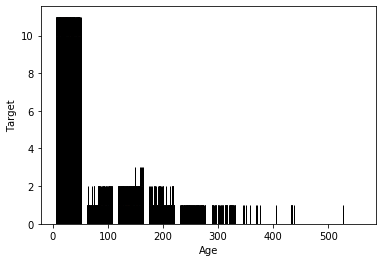

In [11]:
plt.hist(uci, bins = 10, edgecolor='black')

plt.xlabel('Age')
plt.ylabel('Target')
# plt.title('Histograms in Matplotlib')
# plt.show()

In [42]:
import numpy as np
import scipy.stats as stats
import pylab as pl

SyntaxError: invalid character in identifier (<ipython-input-43-ed6ba25fd4ca>, line 2)

$\bf{\rightarrow Exercise: What\ are\ the\ different\ values\ for\ restecg?}$

In [12]:
# Your code here!



### Filtering

In [13]:
uci[uci['age'] == 60]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
82,60,0,2,102,318,0,1,160,0,0.0,2,1,2,1
136,60,0,2,120,178,1,1,96,0,0.0,2,0,2,1
147,60,0,3,150,240,0,1,171,0,0.9,2,0,2,1
174,60,1,0,130,206,0,0,132,1,2.4,1,2,3,0
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3,0
186,60,1,0,130,253,0,1,144,1,1.4,2,1,3,0
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3,0
194,60,1,2,140,185,0,0,155,0,3.0,1,0,2,0
201,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
207,60,0,0,150,258,0,0,157,0,2.6,1,2,3,0


#### DataFrame.applymap() and Series.map()

The ```.applymap()``` method takes a function as input that it will then apply to every entry in the dataframe.

In [14]:
def successor(x):
    return x + 1

In [15]:
uci.applymap(successor).head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,64,2,4,146,234,2,1,151,1,3.3,1,1,2,2
1,38,2,3,131,251,1,2,188,1,4.5,1,1,3,2
2,42,1,2,131,205,1,1,173,1,2.4,3,1,3,2
3,57,2,2,121,237,1,2,179,1,1.8,3,1,3,2
4,58,1,1,121,355,1,2,164,2,1.6,3,1,3,2


The .map() method takes a function as input that it will then apply to every entry in the Series.

In [16]:
uci['age'].map(successor).tail(10)

293    68
294    45
295    64
296    64
297    60
298    58
299    46
300    69
301    58
302    58
Name: age, dtype: int64

## 2. Anonymous Functions (Lambda Abstraction)

Simple functions can be defined right in the function call. This is called 'lambda abstraction'; the function thus defined has no name and hence is "anonymous".

In [17]:
# function without a name - hey, give me the old peak variable, use the round function to give me the info I need (x).
uci['oldpeak'].map(lambda x: round(x))[:4]

0    2
1    4
2    1
3    1
Name: oldpeak, dtype: int64

$\bf{\rightarrow Exercise: Use\ an\ anonymous\ function\ to\ turn\ the\ entries\ in\ age\ to\ strings}$

In [18]:
# Your code here!



## 3. Methods for Re-Organizing DataFrames: .groupby()

Those of you familiar with SQL have probably used the GROUP BY command. Pandas has this, too.

The .groupby() method is especially useful for aggregate functions applied to the data grouped in particular ways.

In [19]:
uci.groupby('sex')

### .groups and .get_group()

In [20]:
uci.groupby('sex').groups

{0: Int64Index([  2,   4,   6,  11,  14,  15,  16,  17,  19,  25,  28,  30,  35,
              36,  38,  39,  40,  43,  48,  49,  50,  53,  54,  59,  60,  65,
              67,  69,  74,  75,  82,  84,  85,  88,  89,  93,  94,  96, 102,
             105, 107, 108, 109, 110, 112, 115, 118, 119, 120, 122, 123, 124,
             125, 127, 128, 129, 130, 131, 134, 135, 136, 140, 142, 143, 144,
             146, 147, 151, 153, 154, 155, 161, 167, 181, 182, 190, 204, 207,
             213, 215, 216, 220, 223, 241, 246, 252, 258, 260, 263, 266, 278,
             289, 292, 296, 298, 302],
            dtype='int64'),
 1: Int64Index([  0,   1,   3,   5,   7,   8,   9,  10,  12,  13,
             ...
             288, 290, 291, 293, 294, 295, 297, 299, 300, 301],
            dtype='int64', length=207)}

In [21]:
uci.groupby('sex').get_group(0) # .tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
11,48,0,2,130,275,0,1,139,0,0.2,2,0,2,1
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0
292,58,0,0,170,225,1,0,146,1,2.8,1,2,1,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0


### Aggregating

In [22]:
uci.groupby('sex').median()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
sex,,,,,,,,,,,,,
0,57,1,131,253,0,1,157,0,0.6,1,0,2,1
1,54,0,130,235,0,1,151,0,0.8,1,0,2,0


$\bf{\rightarrow Exercise: Tell\ me\ the\ average\ cholesterol\ level\ for\ those\ with\ heart\ disease.}$

In [23]:
# Your code here!

### 4. Reshaping a DataFrame

#### .pivot()

Those of you familiar with Excel have probably used Pivot Tables. Pandas has a similar functionality.

In [24]:
uci.pivot(values = 'sex', columns = 'target').tail(10)

target,0,1
293,1.0,NaN
294,1.0,NaN
295,1.0,NaN
296,0.0,NaN
297,1.0,NaN
298,0.0,NaN
299,1.0,NaN
300,1.0,NaN
301,1.0,NaN
302,0.0,NaN


## Methods for Combining DataFrames: .join(), .merge(), .concat(), .melt()

### .join()

In [25]:
toy1 = pd.DataFrame([[63, 142], [33, 47]], columns = ['age', 'HP'])

toy2 = pd.DataFrame([[63, 100], [33, 200]], columns = ['age', 'HP'])

In [26]:
toy1 

,age,HP
0,63,142
1,33,47


In [27]:
toy2

,age,HP
0,63,100
1,33,200


In [28]:
toy1.join(toy2.set_index('age'), on = 'age',
          lsuffix = '_A', rsuffix = '_B').head()

,age,HP_A,HP_B
0,63,142,100
1,33,47,200


### .merge()

In [29]:
ds_chars = pd.read_csv('ds_chars.csv', index_col = 0)

In [30]:
ds_chars

,name,HP,home_state
0,greg,200,WA
1,miles,200,WA
2,alan,170,TX
3,alison,300,DC
4,rachel,200,TX


In [31]:
states = pd.read_csv('states.csv', index_col = 0)

In [32]:
states

,state,nickname,capital
0,WA,evergreen,Olympia
1,TX,alamo,Austin
2,DC,district,Washington
3,OH,buckeye,Columbus
4,OR,beaver,Salem


In [33]:
ds_chars.merge(states, left_on='home_state', right_on = 'state',
               how = 'inner')

,name,HP,home_state,state,nickname,capital
0,greg,200,WA,WA,evergreen,Olympia
1,miles,200,WA,WA,evergreen,Olympia
2,alan,170,TX,TX,alamo,Austin
3,rachel,200,TX,TX,alamo,Austin
4,alison,300,DC,DC,district,Washington


### pd.concat()

$\bf{\rightarrow Exercise: Look\ up\ the documentation\ on\ pd.concat}$ (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) $\bf{and\ use\ it\ to\ concatenate\ ds\_chars\ and\ states.}$
<br/>
$\bf{Your\ result\ should\ still\ have\ only\ five\ rows!}$

In [34]:
pd.concat([ds_chars, states])

C:\Users\laura\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,HP,capital,home_state,name,nickname,state
0,200.0,NaN,WA,greg,NaN,NaN
1,200.0,NaN,WA,miles,NaN,NaN
2,170.0,NaN,TX,alan,NaN,NaN
3,300.0,NaN,DC,alison,NaN,NaN
4,200.0,NaN,TX,rachel,NaN,NaN
0,NaN,Olympia,NaN,NaN,evergreen,WA
1,NaN,Austin,NaN,NaN,alamo,TX
2,NaN,Washington,NaN,NaN,district,DC
3,NaN,Columbus,NaN,NaN,buckeye,OH
4,NaN,Salem,NaN,NaN,beaver,OR


### pd.melt()

Melting removes the structure from your DataFrame and puts the data in a 'variable' and 'value' format.

In [35]:
ds_chars

,name,HP,home_state
0,greg,200,WA
1,miles,200,WA
2,alan,170,TX
3,alison,300,DC
4,rachel,200,TX


In [36]:
pd.melt(ds_chars)

,variable,value
0,name,greg
1,name,miles
2,name,alan
3,name,alison
4,name,rachel
5,HP,200
6,HP,200
7,HP,170
8,HP,300
9,HP,200


## Revisiting our animal shelter plans

Let's load in our animal shelter data using this url: https://data.austintexas.gov/api/views/9t4d-g238/rows.csv?accessType=DOWNLOAD

Using .info() and .describe() what observations can we make about the data?

In [37]:
#your code here 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors


animals = pd.read_csv('https://data.austintexas.gov/api/views/9t4d-g238/rows.csv?accessType=DOWNLOAD')


In [38]:
animals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113909 entries, 0 to 113908
Data columns (total 12 columns):
Animal ID           113909 non-null object
Name                78090 non-null object
DateTime            113909 non-null object
MonthYear           113909 non-null object
Date of Birth       113909 non-null object
Outcome Type        113902 non-null object
Outcome Subtype     51610 non-null object
Animal Type         113909 non-null object
Sex upon Outcome    113905 non-null object
Age upon Outcome    113879 non-null object
Breed               113909 non-null object
Color               113909 non-null object
dtypes: object(12)
memory usage: 10.4+ MB


In [39]:
animals.describe()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
count,113909,78090,113909,113909,113909,113902,51610,113909,113905,113879,113909,113909
unique,101971,18436,93728,93728,6684,9,22,5,5,50,2535,584
top,A721033,Max,04/18/2016 12:00:00 AM,04/18/2016 12:00:00 AM,09/01/2015,Adoption,Partner,Dog,Neutered Male,1 year,Domestic Shorthair Mix,Black/White
freq,33,506,39,39,118,50073,28360,64528,39957,20496,30585,11943


Use an apply to change the dates from strings to datetime objects. Similarly, use an apply to change the ages of the animals from strings to floats.

In [40]:
#your code here


Lastly, use a groupby to show the average age of the different kinds of animal types. Hint: use .unique() on a column to see what unique values are in the column.

In [41]:
#your code here